In [47]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [48]:
(train, val, test), info = tfds.load('fashion_mnist', split=['train[:80%]','train[80%:]','test'], as_supervised=True, with_info=True)

In [49]:
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='C:\\Users\\CSIT Web-01\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-17

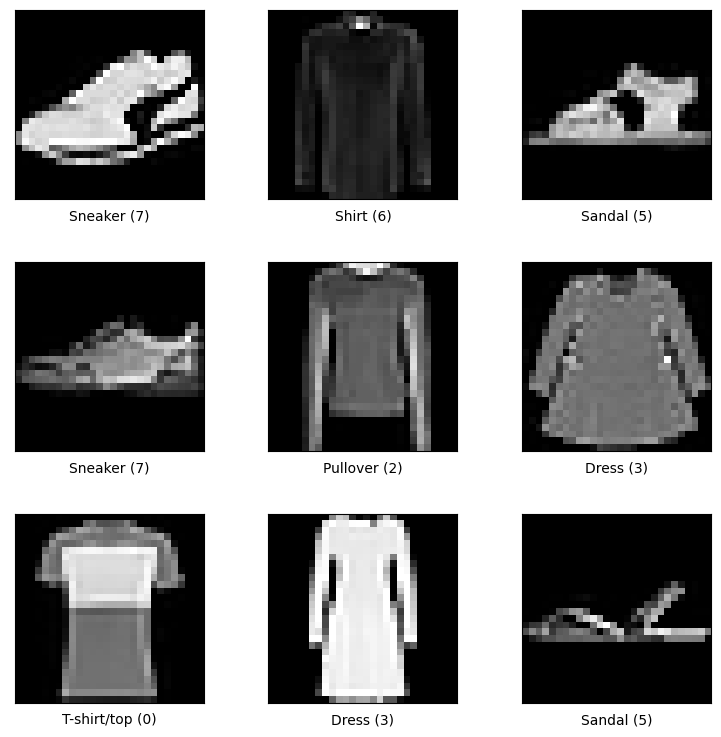

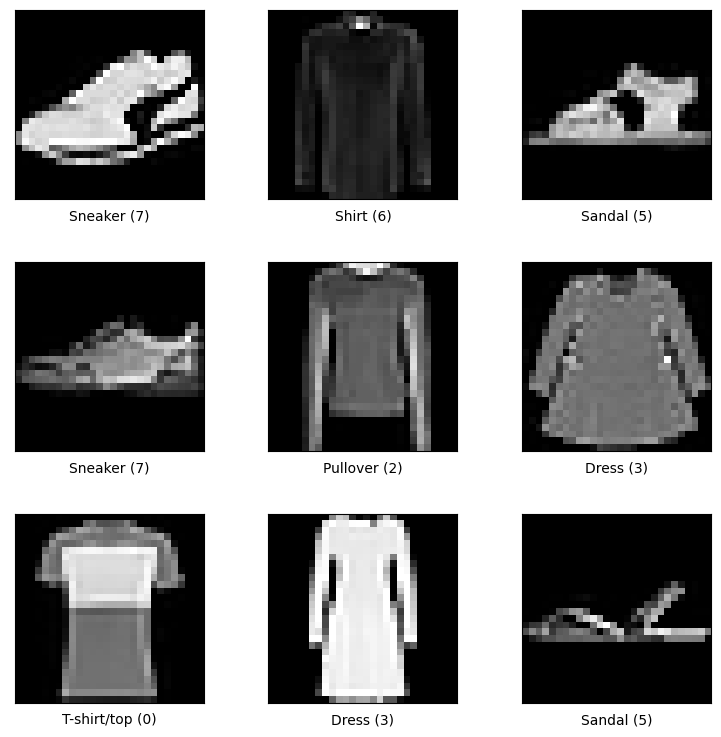

In [50]:
tfds.show_examples(val, info)

In [51]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255, label

train = train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train = train.cache()
train = train.shuffle(info.splits['train'].num_examples)
train = train.batch(128)
train = train.prefetch(tf.data.AUTOTUNE)

val = val.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
val = val.cache()
val = val.batch(128)
val = val.prefetch(tf.data.AUTOTUNE)

test = test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test = test.cache()
test = test.batch(128)
test = test.prefetch(tf.data.AUTOTUNE)

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 32)                173088    
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
hasil = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
375/375 [==============================] - 29s 69ms/step - loss: 0.5418 - accuracy: 0.8110 - val_loss: 0.3757 - val_accuracy: 0.8680
Epoch 2/10
375/375 [==============================] - 26s 68ms/step - loss: 0.3483 - accuracy: 0.8773 - val_loss: 0.3257 - val_accuracy: 0.8836
Epoch 3/10
375/375 [==============================] - 26s 70ms/step - loss: 0.3071 - accuracy: 0.8904 - val_loss: 0.3101 - val_accuracy: 0.8889
Epoch 4/10
375/375 [==============================] - 26s 70ms/step - loss: 0.2785 - accuracy: 0.9010 - val_loss: 0.2789 - val_accuracy: 0.9002
Epoch 5/10
375/375 [==============================] - 26s 69ms/step - loss: 0.2607 - accuracy: 0.9067 - val_loss: 0.2740 - val_accuracy: 0.9010
Epoch 6/10
375/375 [==============================] - 26s 69ms/step - loss: 0.2423 - accuracy: 0.9122 - val_loss: 0.2605 - val_accuracy: 0.9068
Epoch 7/10
375/375 [==============================] - 26s 69ms/step - loss: 0.2257 - accuracy: 0.9182 - val_loss: 0.2535 - val_accuracy:

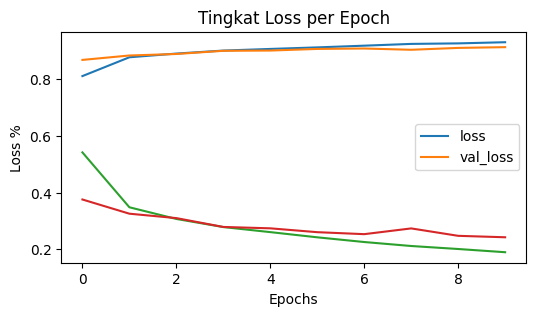

In [55]:
plt.figure(1, figsize=(6,3))
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('Tingkat Akurasi per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Akurasi %')
plt.legend(['accuracy', 'val_accuracy'])

plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('Tingkat Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss %')
plt.legend(['loss', 'val_loss'])

plt.show()

In [56]:
#fungsi prediksi

def hasil_gambar(i, prediksi_array, label_asli, img):

    label_asli, img = label_asli[0][i], img[0][i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    label_pred = np.argmax(prediksi_array)
    if label_pred == label_asli:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[label_pred],
                                          100*np.max(prediksi_array),
                                          class_names[label_asli]    
                                        ), color=color)

In [57]:
prediksi = model.predict(test)

79/79 [==============================] - 2s 21ms/step


In [58]:
class_names = info.features['label'].names

In [59]:
test_image = list(map(lambda x: x[0], test))
test_label = list(map(lambda x: x[1], test))

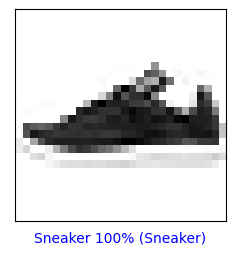

In [60]:
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
hasil_gambar(i, prediksi[i], test_label, test_image)
plt.show()